<a href="https://colab.research.google.com/github/techwithlik/LoanPrediction/blob/main/Visualise_Analysis_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from imblearn.over_sampling import RandomOverSampler

In [88]:
employment_length_mapping = {
    'Unemployed': 0,
    '< 1 year': 0.5,
    '1-4 years': 2.5,
    '4-7 years': 5.5,
    '>= 7 years': 7
}

employment_mapping = {
    'Experienced professionals': 2,
    'Professionals': 1,
    'Unskilled': 0,
    'Unemployed': -1
}

savings_balance_dict = {
    'Unknown/No savings account': 0,
    '< 80 GBP': 40,
    '80 - 400 GBP': 240,
    '400 - 800 GBP': 600,
    '>= 800 GBP': 800
}

home_ownership_dict = {
    'For Free': 1,
    'Rent': 0,
    'Own': 2
}

mva_dict = {
    'No assets': 0,
    'Real Estate': 3,
    'Car or Other': 2,
    'Savings Account/Life Insurance': 1
}

In [89]:
def feature_engineer(df):

  # profit loss ratio
  df['profit_loss_ratio'] = ((df['loan_value'] * df['loan_duration'] * df['instalment_rate']) / 100) / df['loan_value']

  # drop loan purpose
  df = df.drop('loan_purpose', axis=1)

  # home ownership + length of residence as a strength
  # df['home_ownership_num'] = df['home_ownership'].map(home_ownership_dict)
  # df['home_ownership_strength'] = df['home_ownership_num'] * df['length_of_residence']
  # df = df.drop('home_ownership_num', axis=1)
  # df = df.drop('home_ownership', axis=1)
  # df = df.drop('length_of_residence', axis=1)

  # employment stability
  # df['length_of_employment_num'] = df['length_of_employment'].map(employment_length_mapping)
  # df['employment_num'] = df['employment'].map(employment_mapping)
  # df['employment_index_new'] = df['length_of_employment_num'] + df['employment_num']
  # df = df.drop('length_of_employment_num', axis=1)
  # df = df.drop('employment_num', axis=1)

  # savings loan ratio
  # df['savings_balance_num'] = df['savings_account_balance'].map(savings_balance_dict)
  # df['savings_loan_value_ratio'] = df['savings_balance_num']/df['loan_value']
  # df = df.drop('savings_balance_num', axis=1)
  # df = df.drop('savings_account_balance', axis=1)

  return df

In [90]:
# Load the dataset
train_data = pd.read_csv('credit_data_train.csv')

# Identify and remove outliers based on domain knowledge or statistical rules
# For instance, if 'loan_value' has an outlier, we could remove it like this:

train_data = feature_engineer(train_data)

# Separate features and target from the training data
X = train_data.drop('class', axis=1)
y = train_data['class']

# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

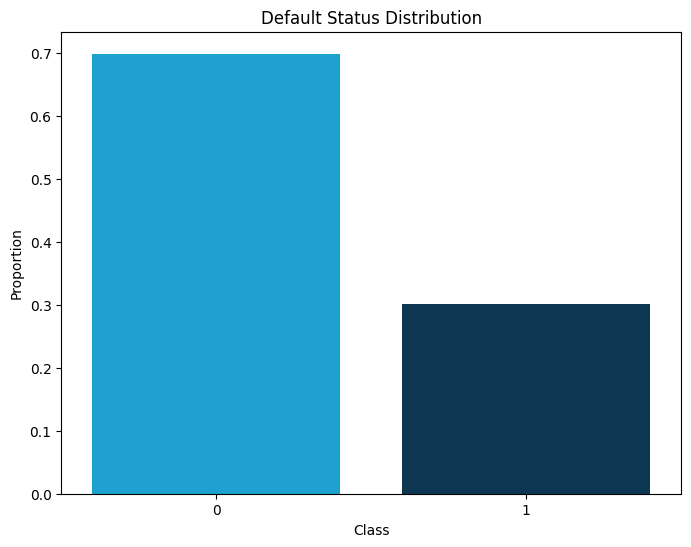

In [91]:
# Custom colors in RGB format
cyan_color = (0/255, 174/255, 239/255)
dark_blue_color = (0/255, 57/255, 93/255)

# Inspect labels distribution
class_proportions = y.value_counts(normalize=True)
plt.figure(figsize=(8, 6))

# Use custom colors in the bar plot
sns.barplot(x=class_proportions.index, y=class_proportions.values, palette=[cyan_color, dark_blue_color])

plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Default Status Distribution')
plt.show()

In this dataset, it looks like around 30% of the people defaulted on their loans whereas only around 70% of people did not default. The imbalanced classes suggests a bias towards the negative class (did not default).

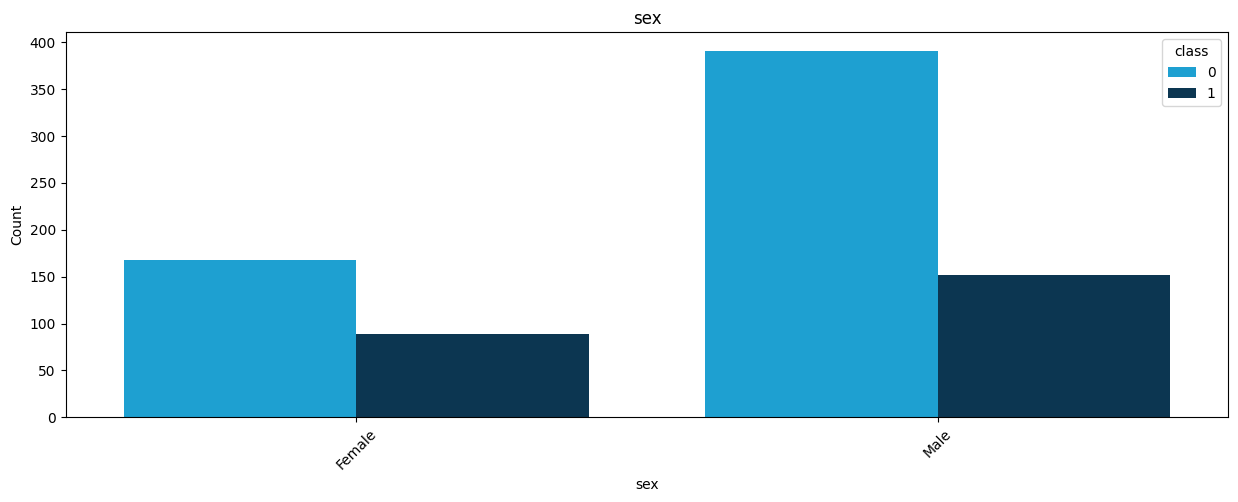

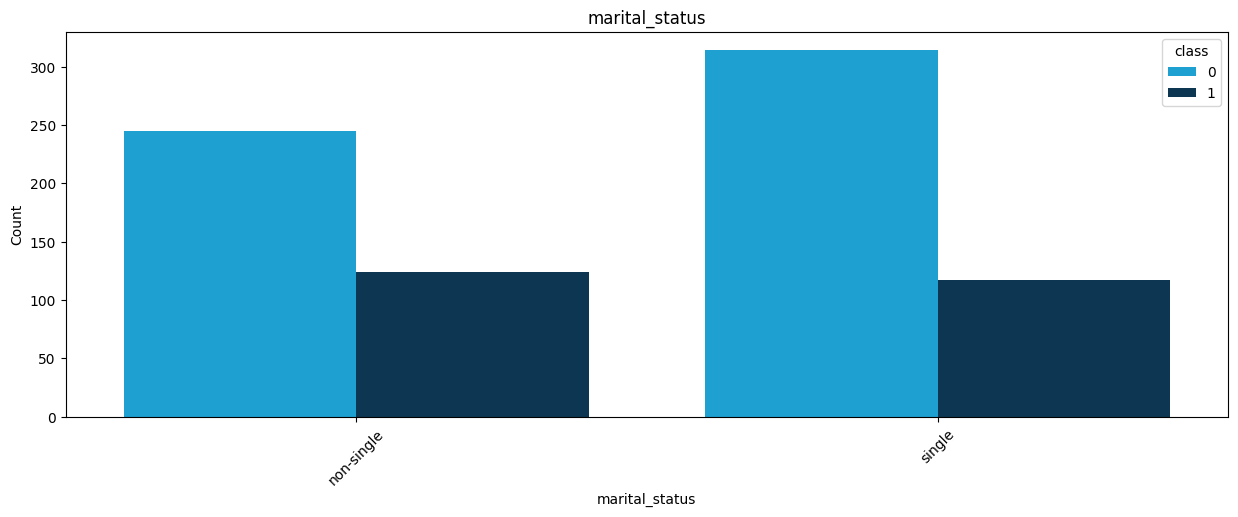

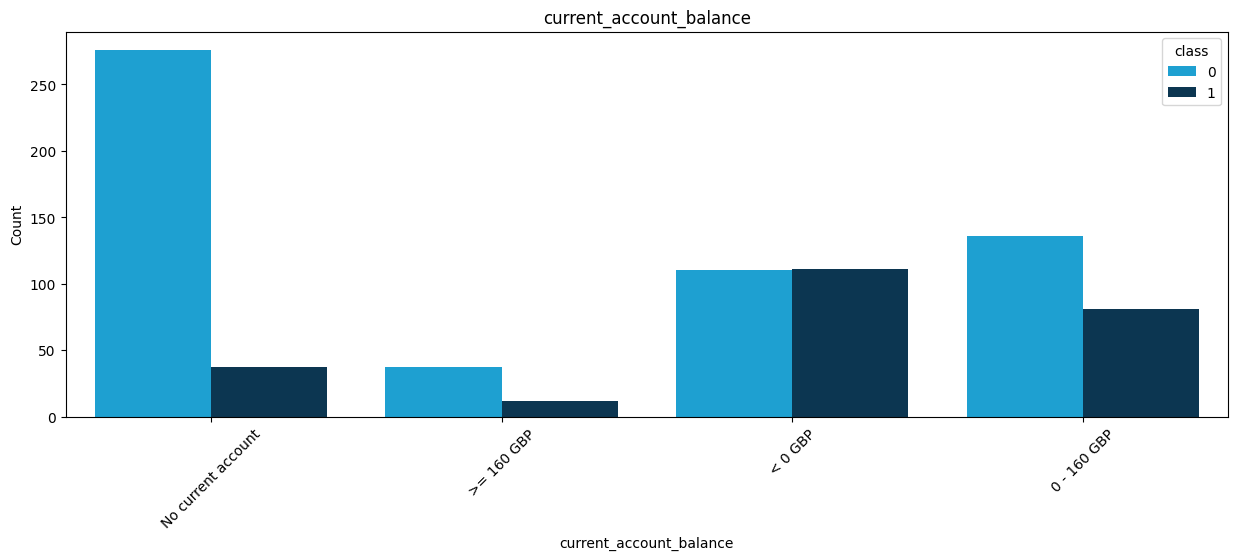

<ipython-input-92-a5428d008f51>:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(x=X[column], hue='class', data=train_data, multiple="stack", palette=[cyan_color, dark_blue_color, bright_blue_color, bright_mint_color, light_grey_color])


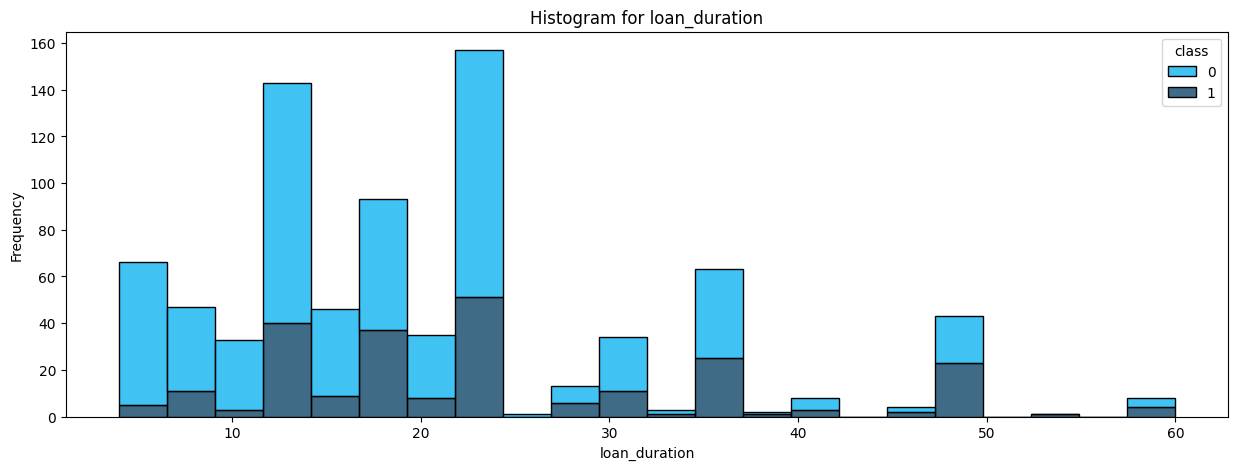

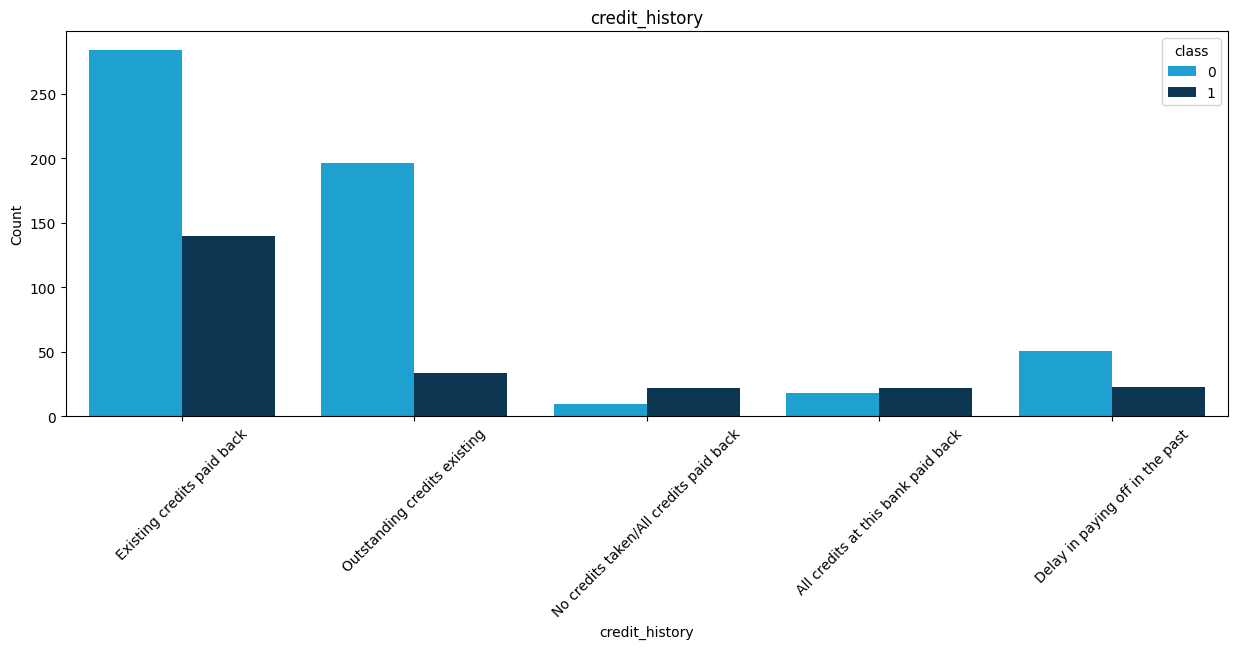

<ipython-input-92-a5428d008f51>:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(x=X[column], hue='class', data=train_data, multiple="stack", palette=[cyan_color, dark_blue_color, bright_blue_color, bright_mint_color, light_grey_color])


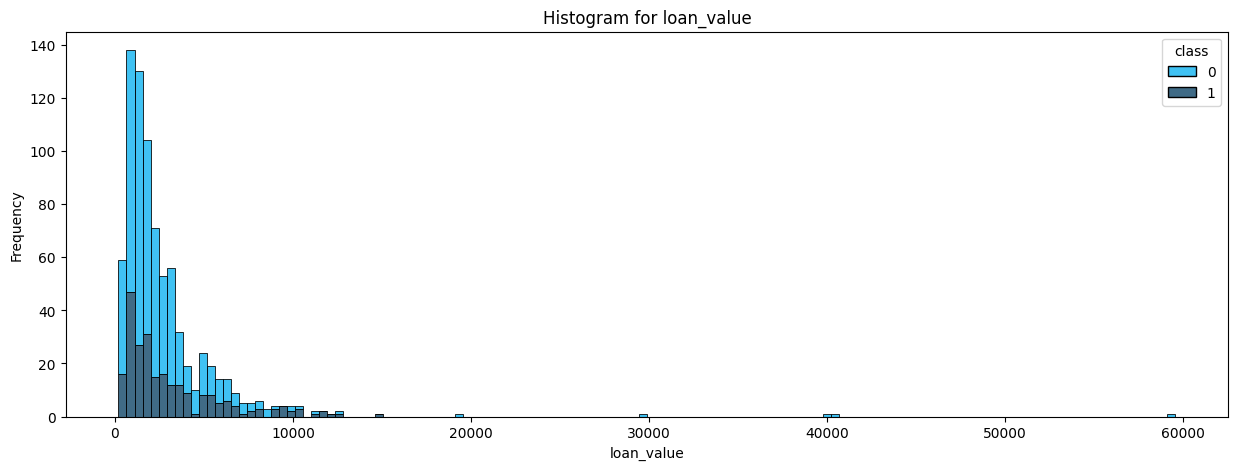

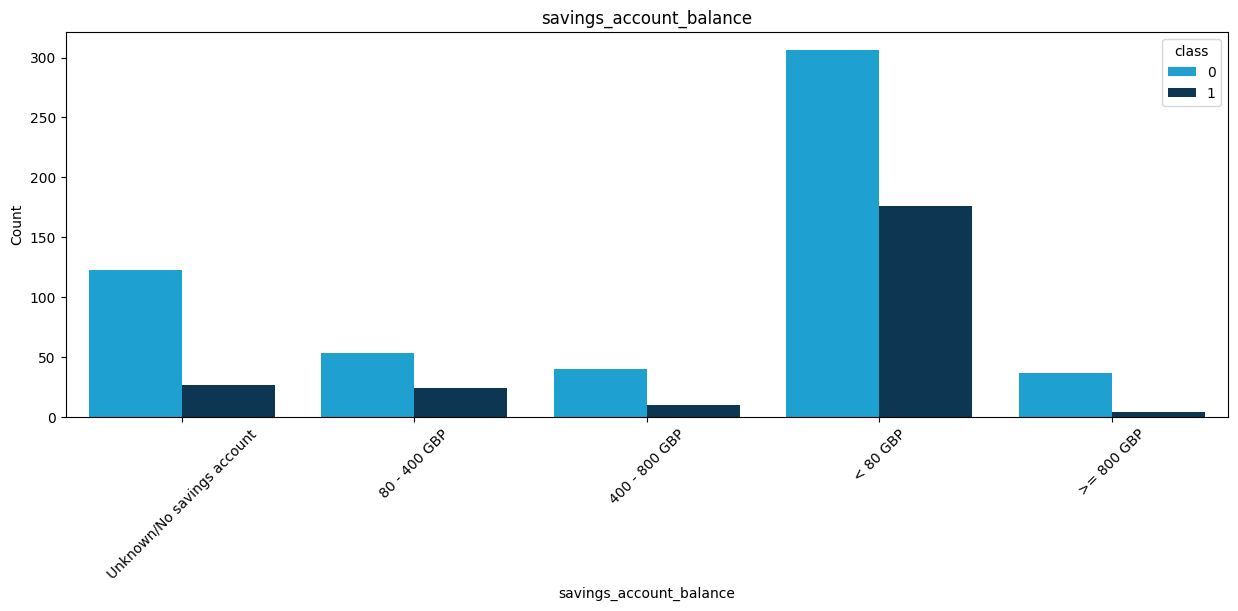

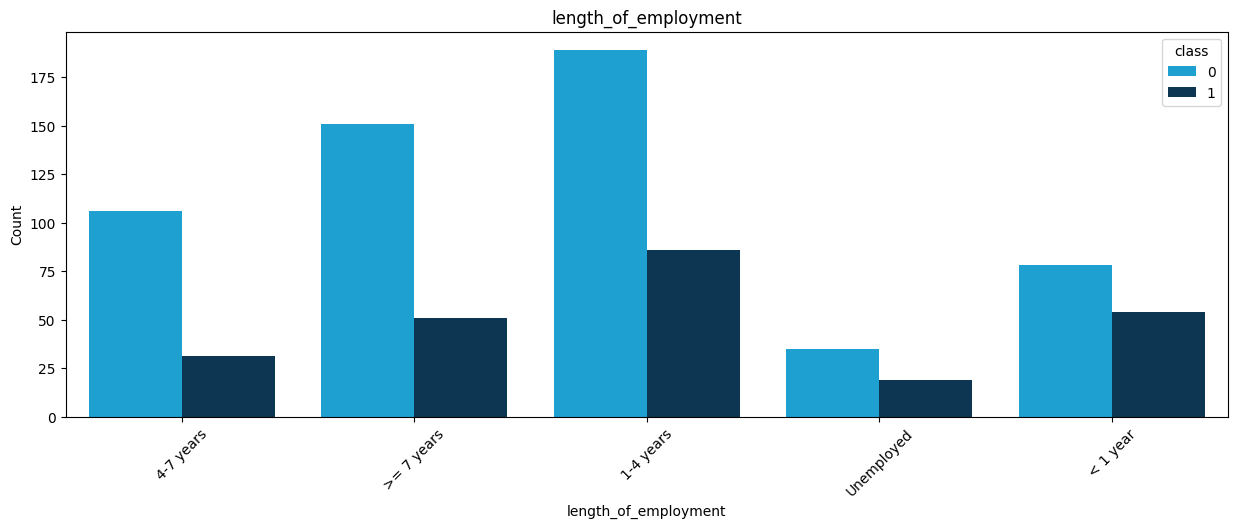

<ipython-input-92-a5428d008f51>:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(x=X[column], hue='class', data=train_data, multiple="stack", palette=[cyan_color, dark_blue_color, bright_blue_color, bright_mint_color, light_grey_color])


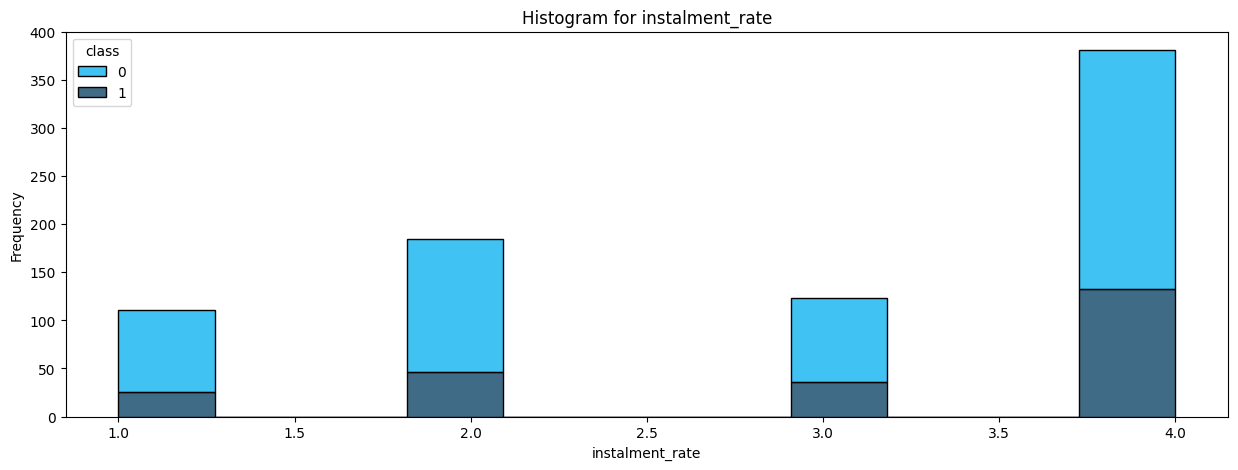

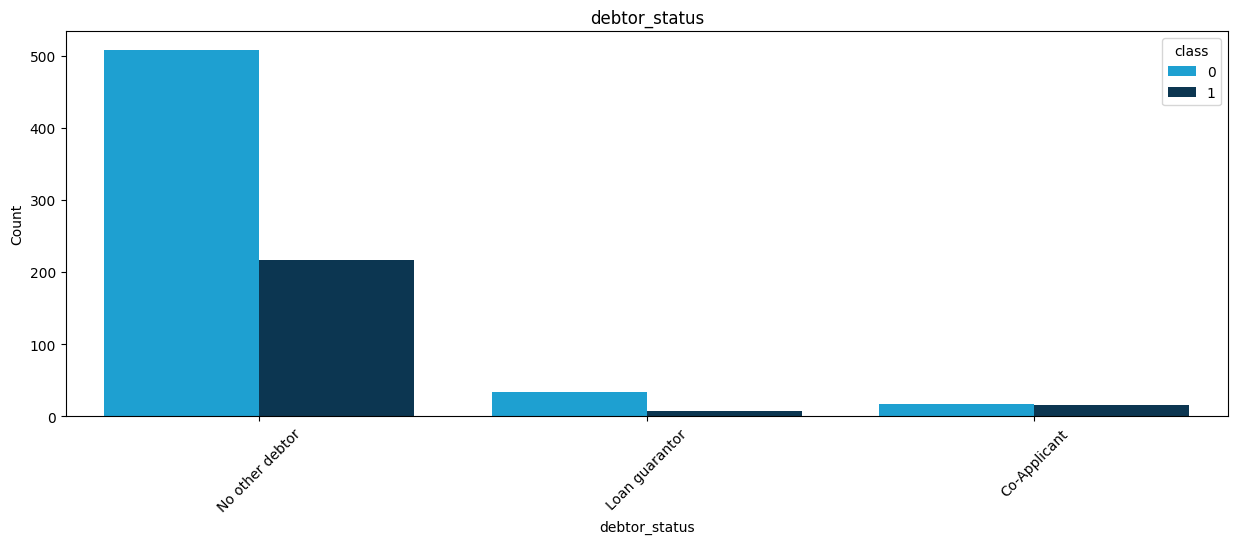

<ipython-input-92-a5428d008f51>:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(x=X[column], hue='class', data=train_data, multiple="stack", palette=[cyan_color, dark_blue_color, bright_blue_color, bright_mint_color, light_grey_color])


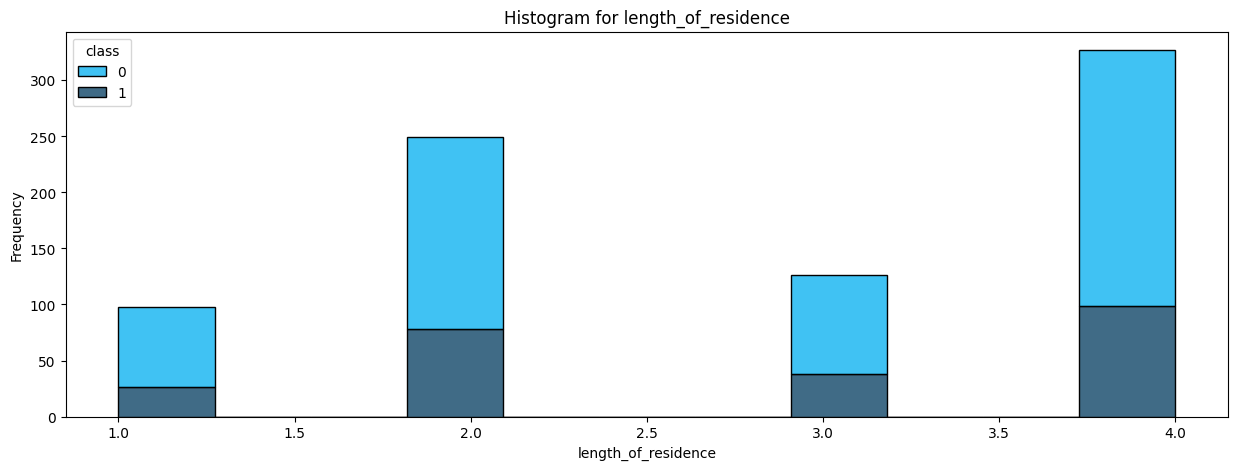

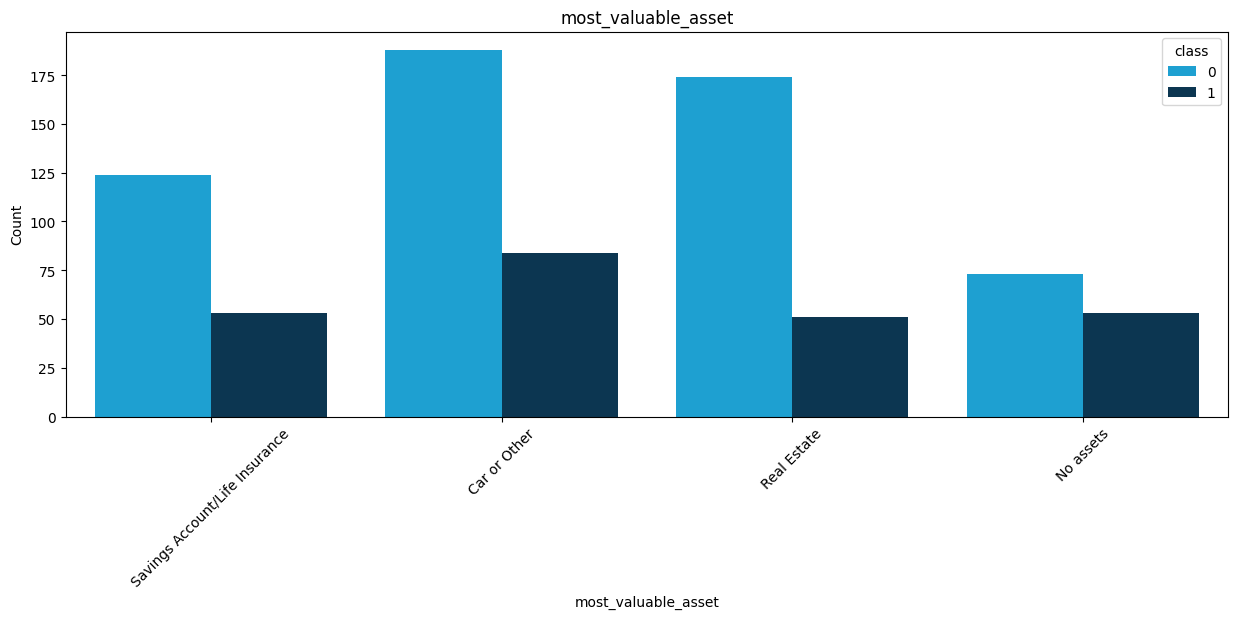

<ipython-input-92-a5428d008f51>:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(x=X[column], hue='class', data=train_data, multiple="stack", palette=[cyan_color, dark_blue_color, bright_blue_color, bright_mint_color, light_grey_color])


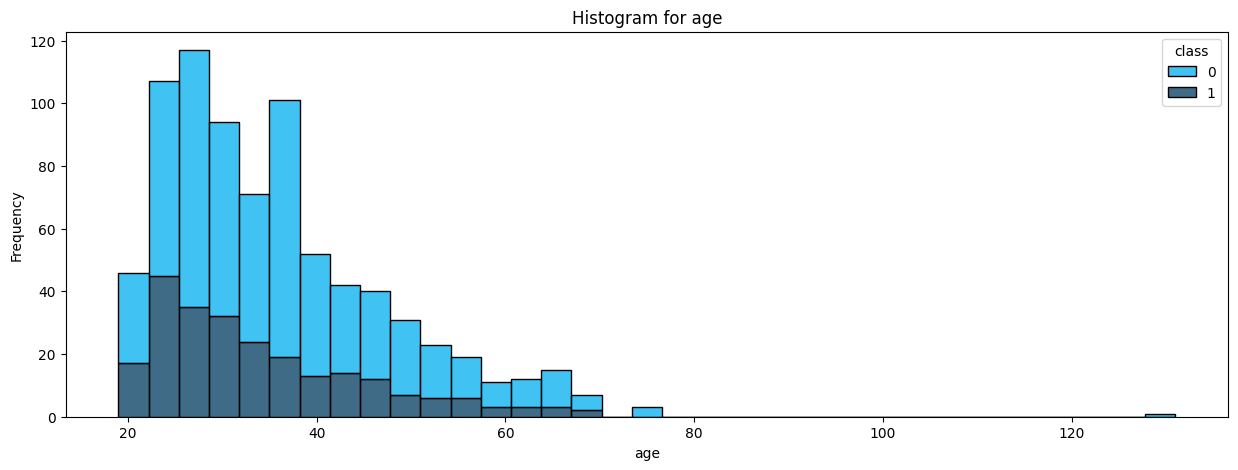

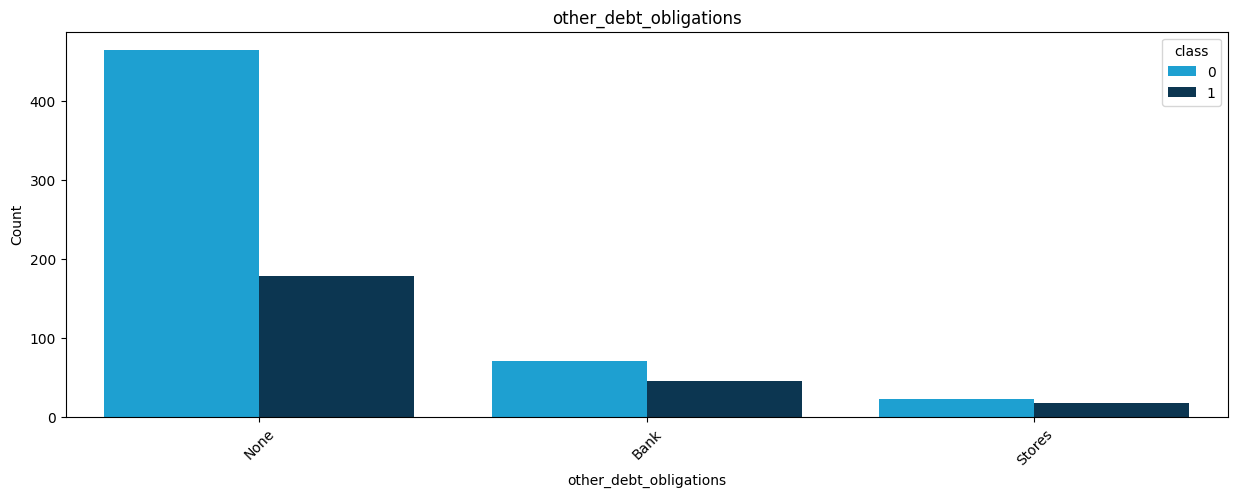

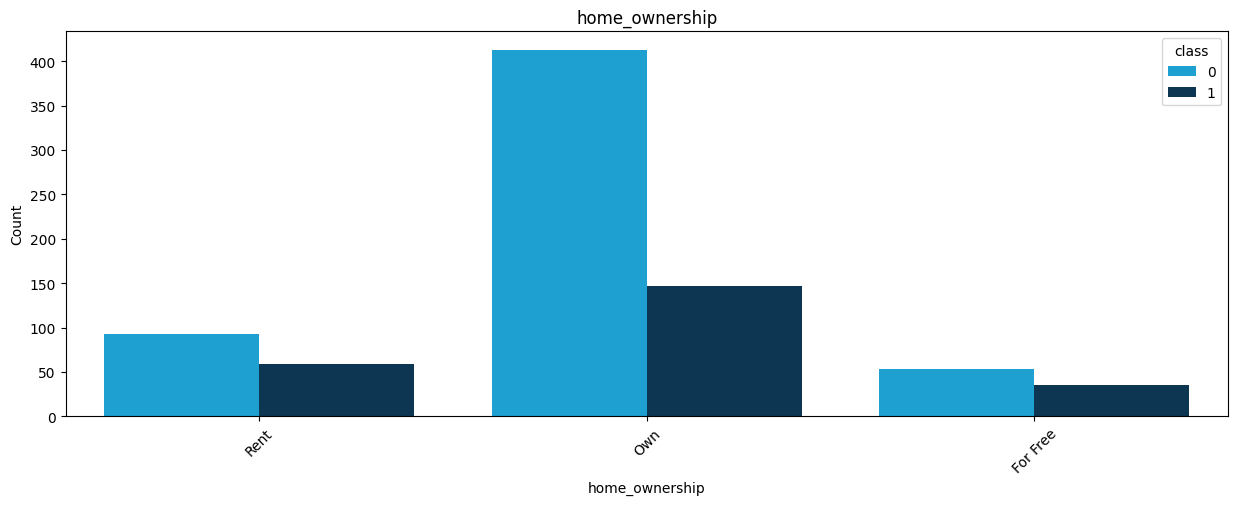

<ipython-input-92-a5428d008f51>:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(x=X[column], hue='class', data=train_data, multiple="stack", palette=[cyan_color, dark_blue_color, bright_blue_color, bright_mint_color, light_grey_color])


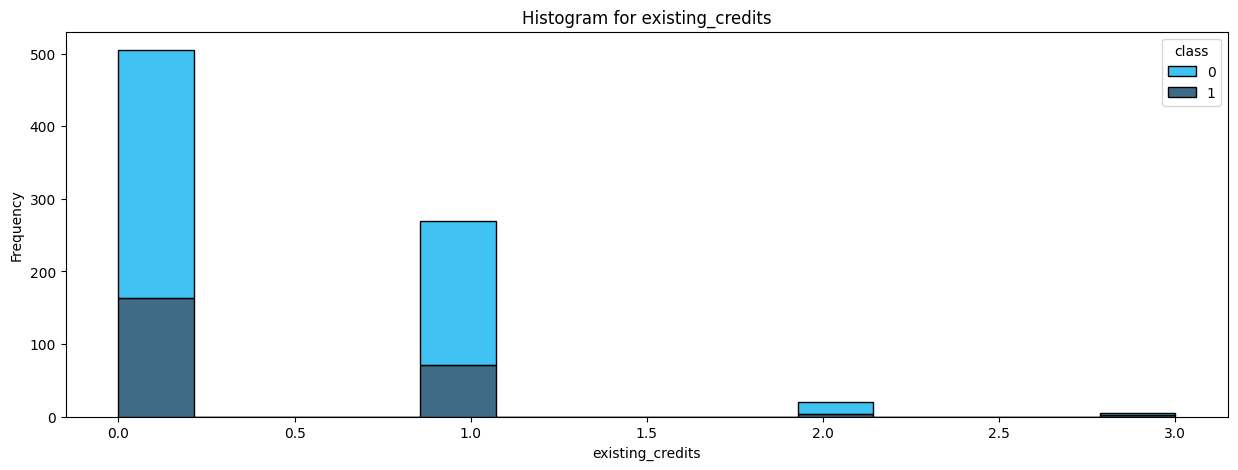

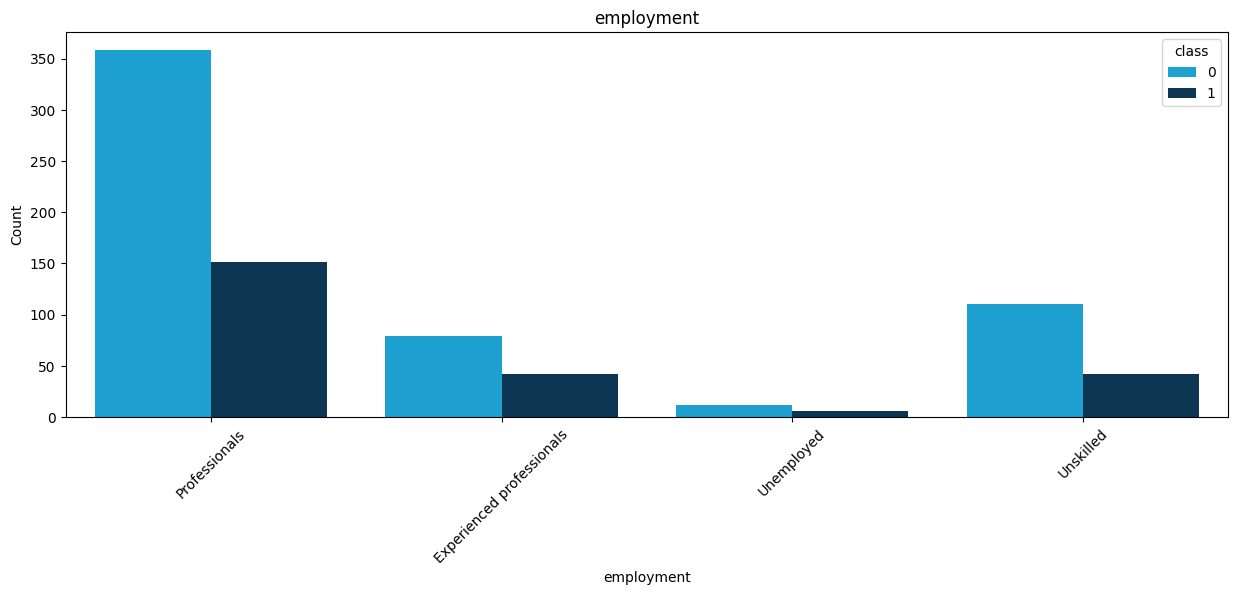

<ipython-input-92-a5428d008f51>:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(x=X[column], hue='class', data=train_data, multiple="stack", palette=[cyan_color, dark_blue_color, bright_blue_color, bright_mint_color, light_grey_color])


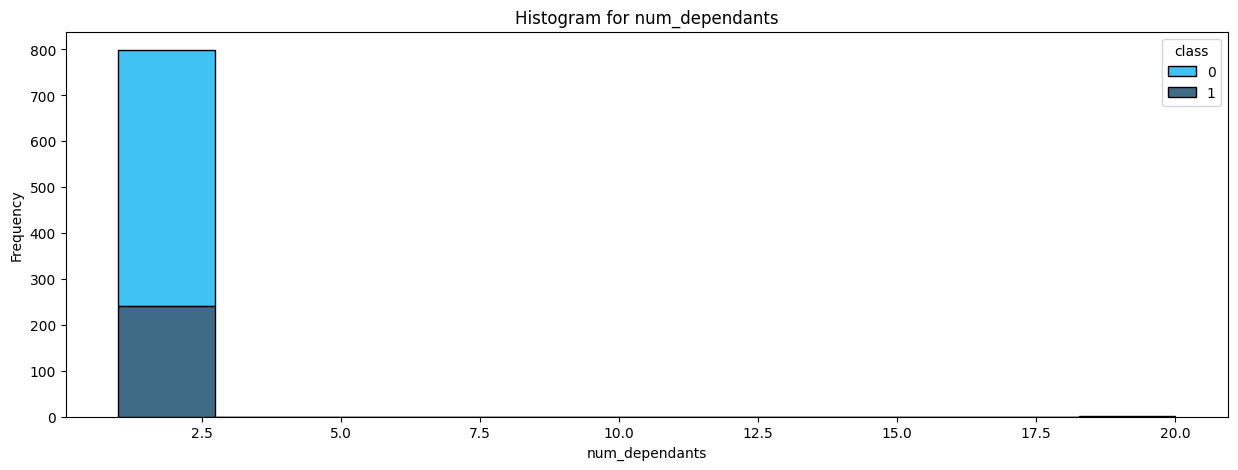

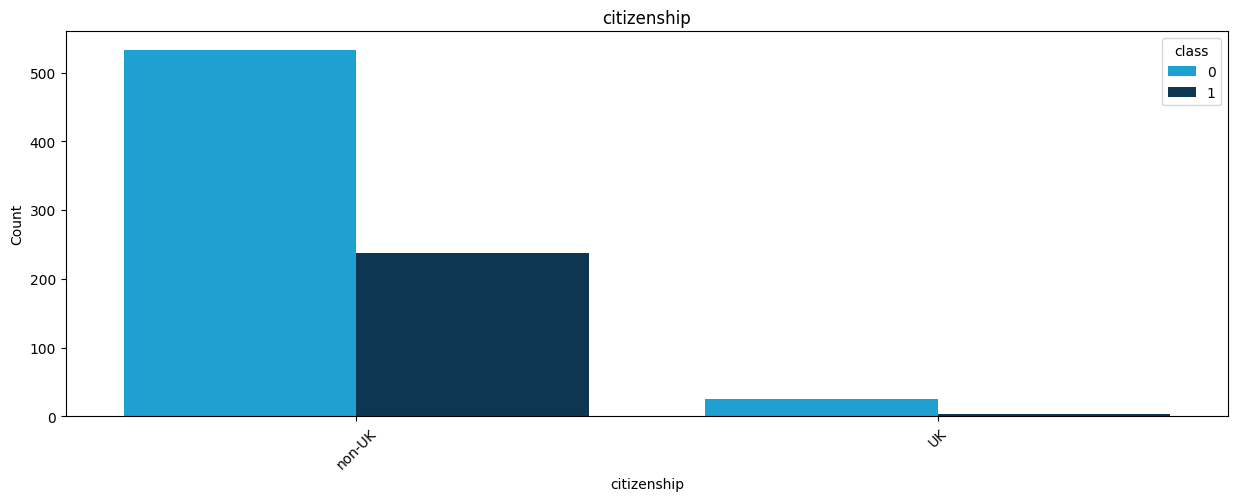

<ipython-input-92-a5428d008f51>:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(x=X[column], hue='class', data=train_data, multiple="stack", palette=[cyan_color, dark_blue_color, bright_blue_color, bright_mint_color, light_grey_color])


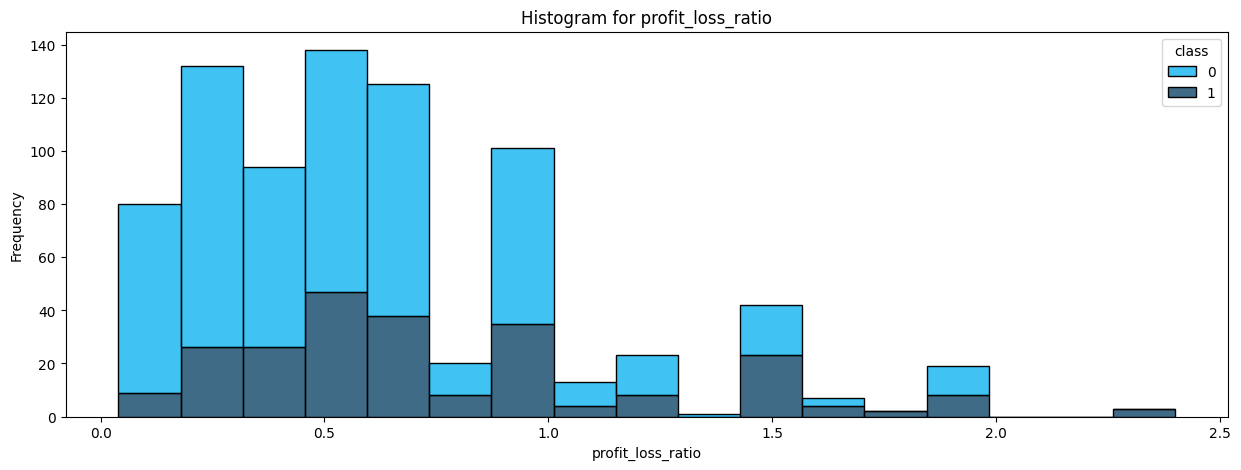

In [92]:
for column in X.columns:
    # Check the data type of the column
    data_type = X[column].dtype

    # Visualize numeric columns using histograms
    if data_type in ['int64', 'float64']:
        plt.figure(figsize=(15, 5))
        sns.histplot(x=X[column], hue='class', data=train_data, multiple="stack", palette=[cyan_color, dark_blue_color, bright_blue_color, bright_mint_color, light_grey_color])
        plt.title(f'Histogram for {column}')
        plt.ylabel('Frequency')
        plt.show()

    # Visualize categorical columns using count plots
    elif data_type == 'object':
        plt.figure(figsize=(15, 5))
        sns.countplot(x=X[column], hue='class', data=train_data, palette=[cyan_color, dark_blue_color, bright_blue_color, bright_mint_color, light_grey_color])
        plt.title(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

In [93]:
# Create the preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the numerical and categorical pipelines into one preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Apply preprocessing and feature engineering
# Fit the preprocessor and transform the training data
X_preprocessed = preprocessor.fit_transform(X)

In [94]:
X_preprocessed_df = pd.DataFrame(preprocessor.fit_transform(X), columns=preprocessor.get_feature_names_out())

X_preprocessed_df

,num__loan_duration,num__loan_value,num__instalment_rate,num__length_of_residence,num__age,num__existing_credits,num__num_dependants,num__profit_loss_ratio,cat__sex_Female,cat__sex_Male,...,cat__other_debt_obligations_Stores,cat__home_ownership_For Free,cat__home_ownership_Own,cat__home_ownership_Rent,cat__employment_Experienced professionals,cat__employment_Professionals,cat__employment_Unemployed,cat__employment_Unskilled,cat__citizenship_UK,cat__citizenship_non-UK
0,0.097764,-0.470665,0.919298,1.052689,-0.894477,-0.708576,-0.222456,0.570026,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.754208,-0.241335,0.919298,0.135313,1.208426,-0.708576,-0.222456,-0.340241,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.012567,-0.119925,-1.751785,-1.699438,-0.642129,-0.708576,-0.222456,-0.954671,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-1.265392,-0.457175,-1.751785,-0.782063,-1.062710,-0.708576,-0.222456,-1.296021,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.243025,-0.065965,-0.861424,-0.782063,-0.978594,-0.708576,-0.222456,-0.613321,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.924603,-0.133415,-1.751785,1.052689,-0.389781,-0.708576,-0.222456,-1.204994,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
796,-1.094997,-0.497645,0.028937,1.052689,1.292542,1.035611,1.105641,-0.886401,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
797,-0.498617,0.028465,-1.751785,-0.782063,0.871962,1.035611,-0.222456,-1.091211,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
798,0.268158,-0.362745,0.919298,-0.782063,-0.473897,-0.708576,1.105641,0.752079,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [95]:
# Apply binning to the numerical features
binning_age = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
binning_loan_duration = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
binning_loan_value = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Fit and transform the binned features
X_age_binned = binning_age.fit_transform(X_preprocessed[:, numerical_cols.get_loc('age')].reshape(-1, 1))
X_loan_duration_binned = binning_loan_duration.fit_transform(X_preprocessed[:, numerical_cols.get_loc('loan_duration')].reshape(-1, 1))
X_loan_value_binned = binning_loan_value.fit_transform(X_preprocessed[:, numerical_cols.get_loc('loan_value')].reshape(-1, 1))

# Replace the original features with the binned features
X_binned = np.copy(X_preprocessed)
X_binned[:, numerical_cols.get_loc('age')] = X_age_binned.ravel()
X_binned[:, numerical_cols.get_loc('loan_duration')] = X_loan_duration_binned.ravel()
X_binned[:, numerical_cols.get_loc('loan_value')] = X_loan_value_binned.ravel()

# Resample the training set to address class imbalance
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_binned, y)

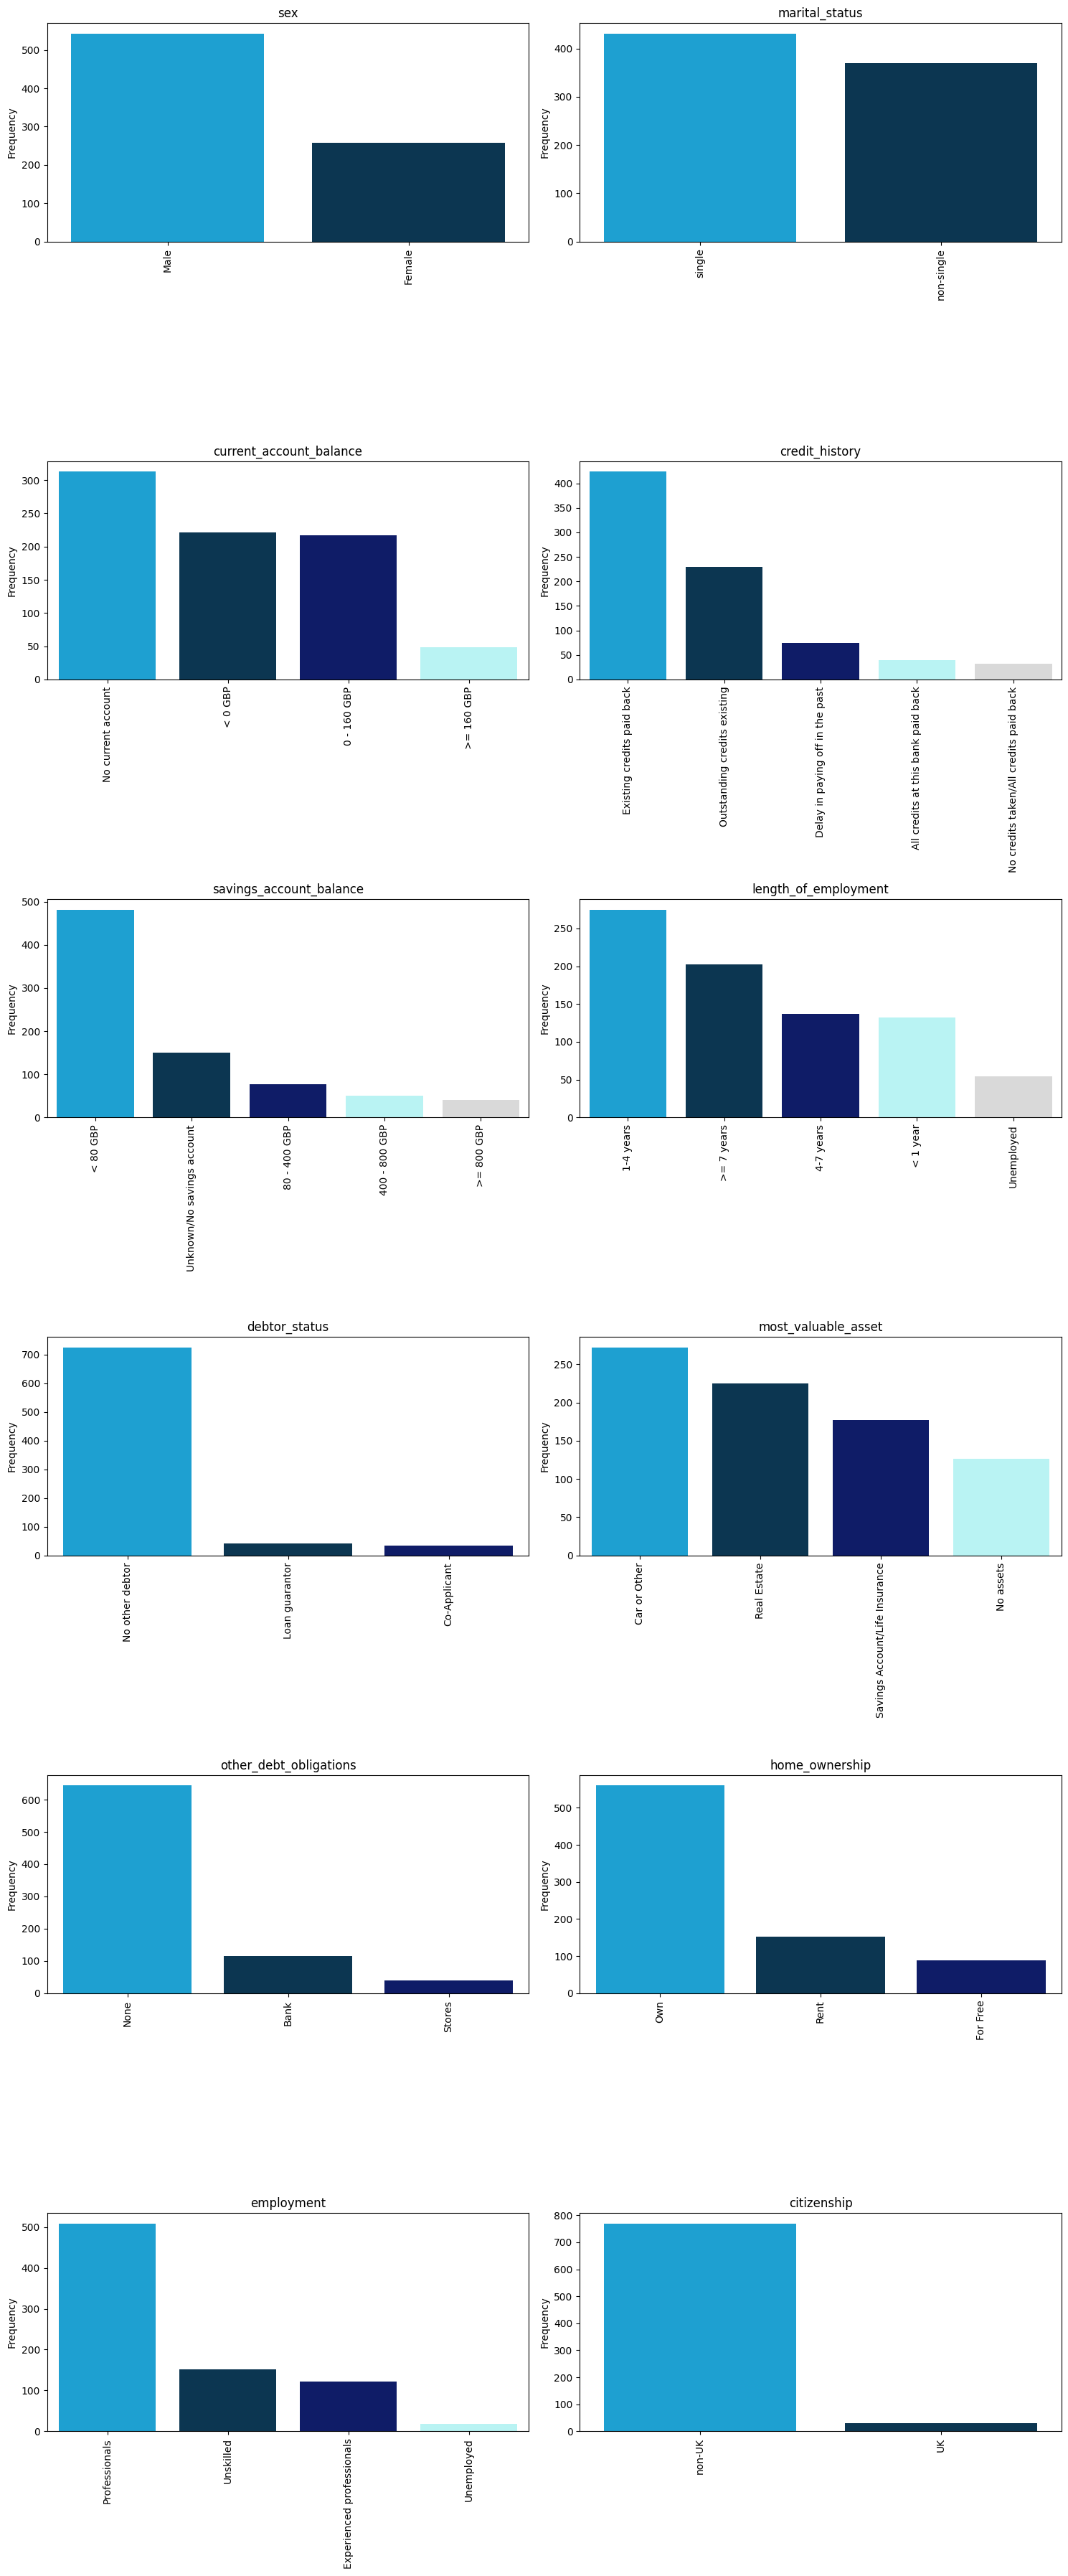

In [96]:
bright_blue_color = (0/255, 18/255, 118/255)
bright_mint_color = (175/255, 253/255, 253/255)
light_grey_color = (217/255, 217/255, 217/255)

# Examine the frequency distribution of categorical features
obj = (X.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(15, 36))
index = 1

for col in object_cols:
    y_counts = X[col].value_counts()
    plt.subplot(6, 2, index)  # 6 rows, 2 columns

    plt.xticks(rotation=90)

    # Use custom colors in the bar plot
    sns.barplot(x=list(y_counts.index), y=y_counts, palette=[cyan_color, dark_blue_color, bright_blue_color, bright_mint_color, light_grey_color])
    plt.title(col)  # Set column name as title
    plt.ylabel('Frequency')
    index += 1

plt.tight_layout()
plt.show()

<ipython-input-97-2fce4732379e>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(), cmap='Blues', annot=True, fmt='.2f', linewidths=2, annot_kws={"size": 10}, cbar=True)


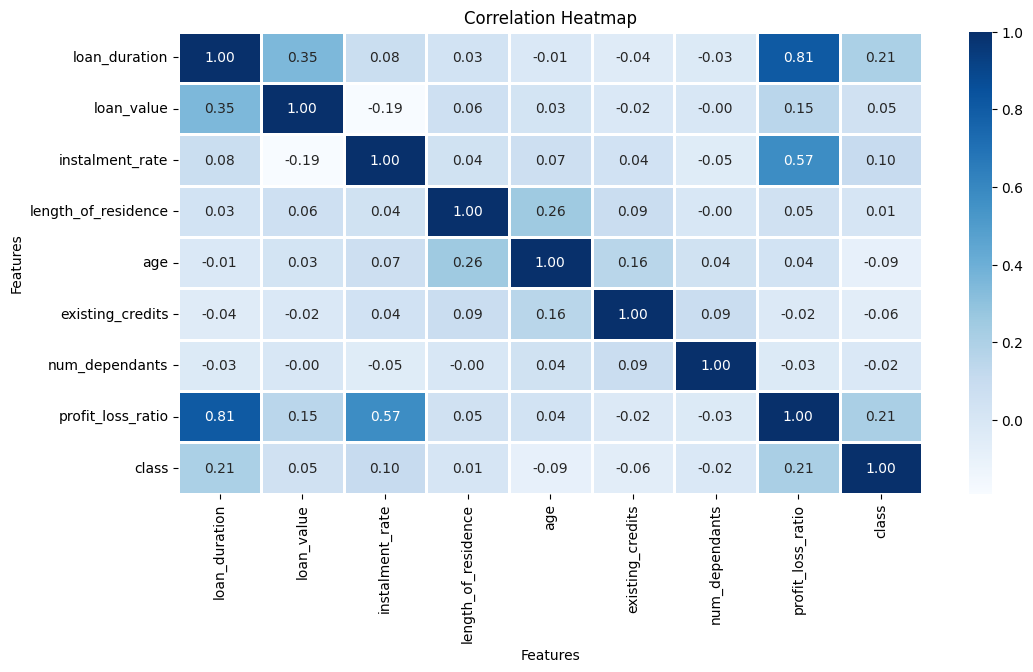

In [97]:
# Assuming X_resampled is a NumPy array
X_resampled_df = pd.DataFrame(X, columns=X.columns)

# Create the heatmap with customizations to investigate relationships
plt.figure(figsize=(12, 6))

# Merge X and y for correlation analysis
merged_data = pd.concat([X, y], axis=1)

sns.heatmap(merged_data.corr(), cmap='Blues', annot=True, fmt='.2f', linewidths=2, annot_kws={"size": 10}, cbar=True)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')
plt.show()

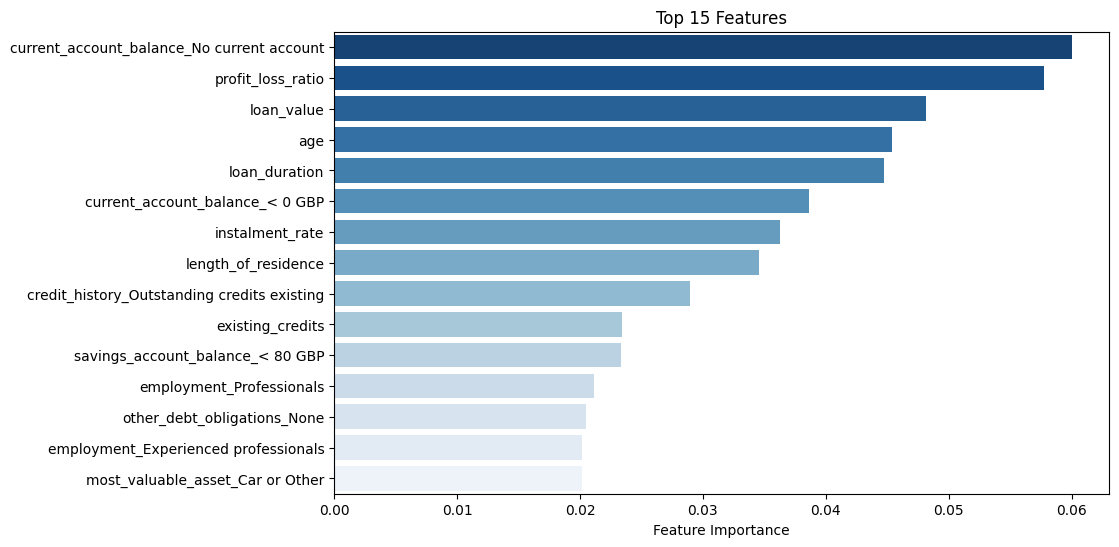

In [98]:
# ExtraTreesClassifier feature selection method
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(X_preprocessed_df, y)

imp_scores = pd.Series(etc.feature_importances_, index=X_preprocessed_df.columns)
imp_cols = imp_scores.nlargest(35)

# Plot top 15 features without labels
top_15_features = imp_cols.head(15)
top_15_features = top_15_features.rename(lambda x: x.split('__')[1])
# print("Top 15 Features and their importance scores:")
# print(top_15_features)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_features.values, y=top_15_features.index, palette='Blues_r')
plt.xlabel('Feature Importance')
plt.title('Top 15 Features')
plt.show()

In [99]:
# Define the model
model = RandomForestClassifier(random_state=0)

# Train the model on the resampled data
model.fit(X_resampled, y_resampled)

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')

In [100]:
# Make predictions on the test set
# (Assuming the same preprocessing steps apply to the test set, including binning)
test_data = pd.read_csv('credit_data_test.csv')

test_data = feature_engineer(test_data)

test_data.head(5)

,id,sex,marital_status,current_account_balance,loan_duration,credit_history,loan_value,savings_account_balance,length_of_employment,instalment_rate,...,length_of_residence,most_valuable_asset,age,other_debt_obligations,home_ownership,existing_credits,employment,num_dependants,citizenship,profit_loss_ratio
0,0,Male,single,0 - 160 GBP,15,All credits at this bank paid back,5500,80 - 400 GBP,Unemployed,1,...,2,Savings Account/Life Insurance,34,None,Own,0,Experienced professionals,2,non-UK,0.15
1,1,Male,non-single,< 0 GBP,36,Existing credits paid back,12700,< 80 GBP,Unemployed,2,...,3,Car or Other,43,None,Own,0,Experienced professionals,1,non-UK,0.72
2,2,Male,single,No current account,12,No credits taken/All credits paid back,2200,< 80 GBP,>= 7 years,2,...,4,Savings Account/Life Insurance,34,None,Own,1,Professionals,1,non-UK,0.24
3,3,Male,single,< 0 GBP,36,Existing credits paid back,2750,< 80 GBP,>= 7 years,4,...,2,Car or Other,42,None,Own,0,Professionals,2,non-UK,1.44
4,4,Male,single,< 0 GBP,48,No credits taken/All credits paid back,3700,< 80 GBP,>= 7 years,3,...,4,No assets,24,None,For Free,1,Professionals,2,non-UK,1.44


In [101]:
X_test_preprocessed = preprocessor.transform(test_data)
# Apply the same binning to the test data
X_test_age_binned = binning_age.transform(X_test_preprocessed[:, numerical_cols.get_loc('age')].reshape(-1, 1))
X_test_loan_duration_binned = binning_loan_duration.transform(X_test_preprocessed[:, numerical_cols.get_loc('loan_duration')].reshape(-1, 1))
X_test_loan_value_binned = binning_loan_value.transform(X_test_preprocessed[:, numerical_cols.get_loc('loan_value')].reshape(-1, 1))
# Replace the original features with the binned features in the test data
X_test_binned = np.copy(X_test_preprocessed)
X_test_binned[:, numerical_cols.get_loc('age')] = X_test_age_binned.ravel()
X_test_binned[:, numerical_cols.get_loc('loan_duration')] = X_test_loan_duration_binned.ravel()
X_test_binned[:, numerical_cols.get_loc('loan_value')] = X_test_loan_value_binned.ravel()
# Predict on the binned test data
# test_predictions = model.predict(X_test_binned)

# Generating predictions with the trained model
test_probabilities = model.predict_proba(X_test_binned)[:, 1]
optimal_threshold = 0.41  # Determined from previous profit maximization analysis
test_predictions = (test_probabilities >= optimal_threshold).astype(int)

# Output the predictions
output = pd.DataFrame({'id': test_data['id'], 'class': test_predictions})
# output.to_csv('sample_submission_test.csv', index=False)
output.to_csv('sample_submission_prfLssRt_noLnPrps114.csv', index=False)

# Print the average cross-validation score
print(f'Average CV accuracy: {cv_scores.mean()}')

Average CV accuracy: 0.887367873158232
